In [15]:
from pathlib import Path
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [16]:
notebook_path = Path().resolve()
root_dir = notebook_path.parent

csv_file = root_dir / "data" / "adult.csv"

df = pd.read_csv(csv_file)
df.head()
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df["salary"] = df["salary"].map(lambda x: 1 if x == ">50K" else 0)
df.rename(columns={"salary": "50K+"}, inplace=True)
df = df[["age", "workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "hours-per-week", "native-country", "salary K$", "50K+"]]
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary K$,50K+
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,35,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,27,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,43,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,36,0
30158,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,173,1
30159,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,40,0
30160,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,38,0


# Task 1
Print the count of men and women in the dataset.

In [17]:
df[df["sex"] == "Female"].value_counts()

age  workclass  education     marital-status  occupation         relationship   race   sex     hours-per-week  native-country  salary K$  50K+
22   Private    Some-college  Never-married   Adm-clerical       Not-in-family  White  Female  40              United-States   44         0       2
                HS-grad       Never-married   Other-service      Not-in-family  White  Female  40              United-States   47         0       2
                                              Tech-support       Not-in-family  White  Female  40              United-States   15         0       2
27   Private    Bachelors     Never-married   Adm-clerical       Not-in-family  White  Female  40              United-States   15         0       2
55   Private    HS-grad       Divorced        Adm-clerical       Not-in-family  White  Female  40              United-States   49         0       2
                                                                                                                     

In [18]:
df[df["sex"] == "Male"].value_counts()

age  workclass         education     marital-status      occupation         relationship  race                sex   hours-per-week  native-country  salary K$  50K+
32   Private           HS-grad       Married-civ-spouse  Craft-repair       Husband       White               Male  40              United-States   20         0       3
24   Private           HS-grad       Married-civ-spouse  Craft-repair       Husband       White               Male  40              United-States   20         0       3
32   Private           HS-grad       Married-civ-spouse  Craft-repair       Husband       White               Male  40              United-States   40         0       3
25   Private           HS-grad       Married-civ-spouse  Transport-moving   Husband       White               Male  40              United-States   37         0       3
35   Private           HS-grad       Married-civ-spouse  Craft-repair       Husband       White               Male  40              United-States   35         0

# Task 2
Find the average age of men in dataset

In [19]:
df[df["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [20]:
df_countries_count = df["native-country"].value_counts(normalize=True) * 100
df_countries_count["Poland"]

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [21]:
fifty_k_plus = df[df["50K+"] == 1]["age"]
print(fifty_k_plus.mean())
print(fifty_k_plus.std())

43.95911028236548
10.269632835673852


In [22]:
fifty_k_less = df[df["50K+"] == 0]["age"]
print(fifty_k_less.mean())
print(fifty_k_less.std())

36.60806038668668
13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [23]:
df[~df["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]) & (df["50K+"] == 1)].count()

age               3178
workclass         3178
education         3178
marital-status    3178
occupation        3178
relationship      3178
race              3178
sex               3178
hours-per-week    3178
native-country    3178
salary K$         3178
50K+              3178
dtype: int64

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [24]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary K$,50K+
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,35,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,27,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,43,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,36,0
30158,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,173,1
30159,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,40,0
30160,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,38,0


In [25]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [26]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary K$,50K+
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,35,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,27,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,43,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,36,0
30158,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,173,1
30159,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,40,0
30160,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,38,0


In [27]:
married = df[df["marital-status"].str.startswith("Married")]
non_married = df[~df["marital-status"].str.startswith("Married")]
avg_married_salary = married["salary K$"].mean()
avg_non_married_salary = non_married["salary K$"].mean()
print(avg_married_salary)
print(avg_non_married_salary)

107.3532097399004
43.240927034254426


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [28]:
df[df["hours-per-week"] == df["hours-per-week"].max()].value_counts()

age  workclass         education     marital-status      occupation        relationship   race                sex     hours-per-week  native-country  salary K$  50K+
19   Private           7th-8th       Married-civ-spouse  Craft-repair      Husband        White               Male    99              United-States   42         0       1
44   Self-emp-not-inc  Assoc-acdm    Married-civ-spouse  Other-service     Wife           White               Female  99              United-States   39         0       1
51   Private           Doctorate     Married-civ-spouse  Prof-specialty    Husband        Asian-Pac-Islander  Male    99              South           40         0       1
50   Self-emp-inc      Some-college  Married-civ-spouse  Exec-managerial   Husband        White               Male    99              United-States   54         1       1
49   Private           10th          Separated           Exec-managerial   Not-in-family  Black               Male    99              United-States   

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

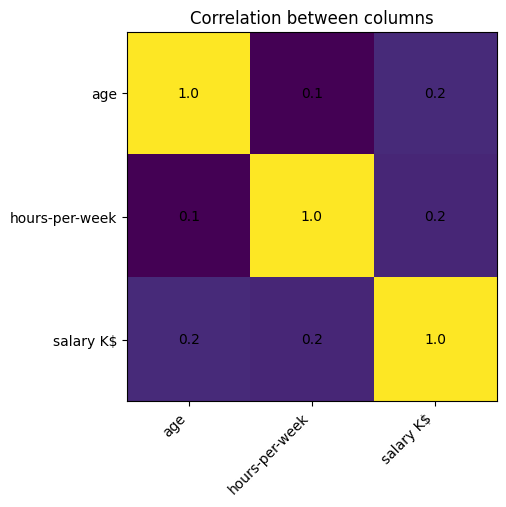

In [55]:
corr_columns = ["age", "hours-per-week", "salary K$"]
correlation = df[corr_columns].corr()
fig, ax = plt.subplots()
ax.set_title("Correlation between columns")
ax.set_xticks(np.arange(len(corr_columns)), labels=corr_columns)
ax.set_yticks(np.arange(len(corr_columns)), labels=corr_columns)
ax.set_xticklabels(corr_columns, rotation=45, ha='right')
ax.imshow(correlation)
for (i, j), z in np.ndenumerate(correlation):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

C:\Users\eduard\AppData\Local\Temp\ipykernel_13504\1568948808.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_workclass_salary.index, rotation=45, ha='right')


<BarContainer object of 7 artists>

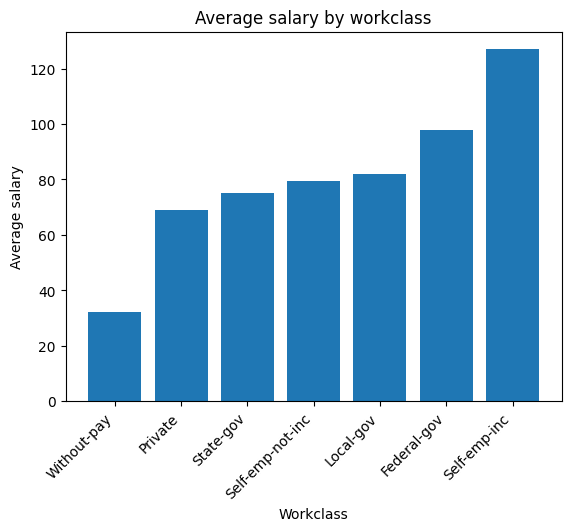

In [54]:
avg_workclass_salary = df.groupby(["workclass"])["salary K$"].mean().sort_values(ascending=True)

fig, ax = plt.subplots()
ax.set_title("Average salary by workclass")
ax.set_ylabel("Average salary")
ax.set_xlabel("Workclass")
ax.set_xticklabels(avg_workclass_salary.index, rotation=45, ha='right')
ax.bar(avg_workclass_salary.index, avg_workclass_salary.values)

In [30]:
avg_occupation_salary = df.groupby(["occupation"])["salary K$"].mean().sort_values(ascending=True)

In [31]:
avg_occupation_salary

occupation
Priv-house-serv       33.832168
Other-service         39.039539
Handlers-cleaners     43.037778
Farming-fishing       51.287159
Machine-op-inspct     53.674975
Armed-Forces          54.111111
Adm-clerical          54.863478
Transport-moving      66.212468
Craft-repair          69.823821
Sales                 76.058873
Tech-support          81.061404
Protective-serv       88.021739
Prof-specialty       106.431897
Exec-managerial      116.073898
Name: salary K$, dtype: float64

C:\Users\eduard\AppData\Local\Temp\ipykernel_13504\3039706341.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_occupation_salary.index, rotation=45, ha='right')


<BarContainer object of 14 artists>

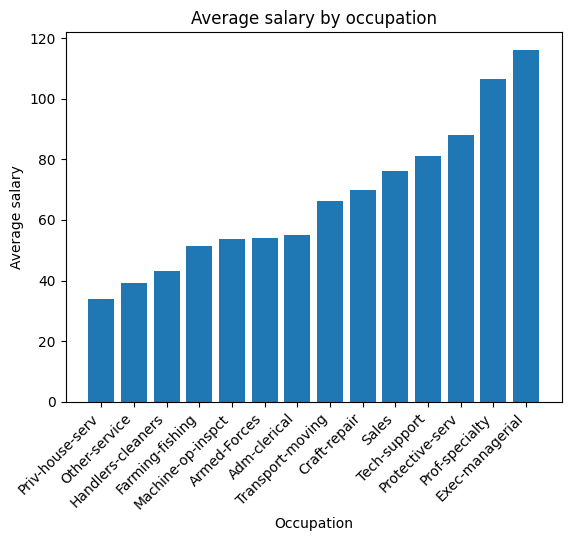

In [32]:
fig, ax = plt.subplots()
ax.set_title("Average salary by occupation")
ax.set_ylabel("Average salary")
ax.set_xlabel("Occupation")
ax.set_xticklabels(avg_occupation_salary.index, rotation=45, ha='right')
ax.bar(avg_occupation_salary.index, avg_occupation_salary.values)

In [33]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary K$,50K+
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,35,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,27,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,43,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,36,0
30158,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,173,1
30159,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,40,0
30160,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,38,0


In [34]:
avg_marital_status_salary = df.groupby(["marital-status"])["salary K$"].mean().sort_values(ascending=True)

C:\Users\eduard\AppData\Local\Temp\ipykernel_13504\3699091642.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_marital_status_salary.index, rotation=45, ha='right')


<BarContainer object of 7 artists>

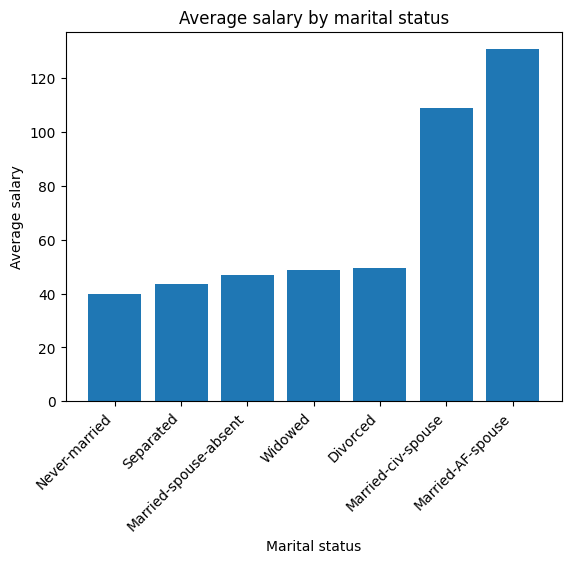

In [35]:
fig, ax = plt.subplots()
ax.set_title("Average salary by marital status")
ax.set_ylabel("Average salary")
ax.set_xlabel("Marital status")
ax.set_xticklabels(avg_marital_status_salary.index, rotation=45, ha='right')
ax.bar(avg_marital_status_salary.index, avg_marital_status_salary.values)

In [36]:
avg_race_salary = df.groupby(["race"])["salary K$"].mean().sort_values(ascending=True)

C:\Users\eduard\AppData\Local\Temp\ipykernel_13504\3699948520.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_race_salary.index, rotation=45, ha='right')


<BarContainer object of 5 artists>

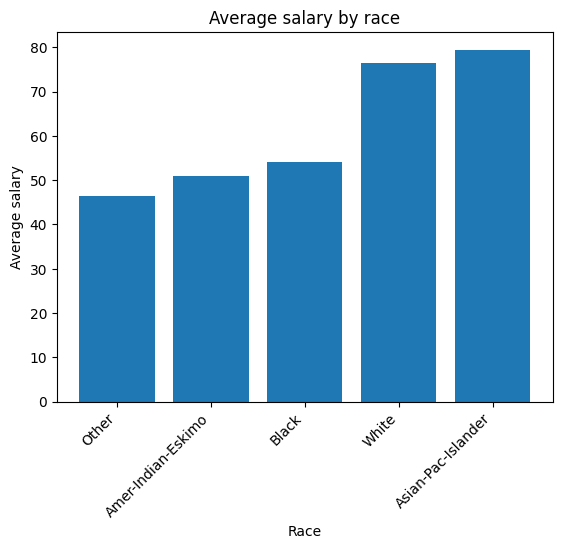

In [37]:
fig, ax = plt.subplots()
ax.set_title("Average salary by race")
ax.set_ylabel("Average salary")
ax.set_xlabel("Race")
ax.set_xticklabels(avg_race_salary.index, rotation=45, ha='right')
ax.bar(avg_race_salary.index, avg_race_salary.values)

In [38]:
avg_gender_salary = df.groupby(["sex"])["salary K$"].mean().sort_values(ascending=True)

C:\Users\eduard\AppData\Local\Temp\ipykernel_13504\3711001089.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_gender_salary.index, rotation=45, ha='right')


<BarContainer object of 2 artists>

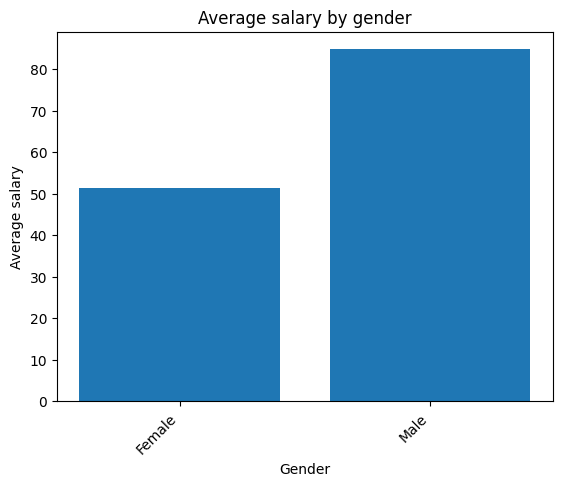

In [39]:
fig, ax = plt.subplots()
ax.set_title("Average salary by gender")
ax.set_ylabel("Average salary")
ax.set_xlabel("Gender")
ax.set_xticklabels(avg_gender_salary.index, rotation=45, ha='right')
ax.bar(avg_gender_salary.index, avg_gender_salary.values)

In [40]:
avg_country_salary = df.groupby(["native-country"])["salary K$"].mean().sort_values(ascending=True)

C:\Users\eduard\AppData\Local\Temp\ipykernel_13504\2901671623.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_country_salary.index, rotation=45, ha='right')


<BarContainer object of 41 artists>

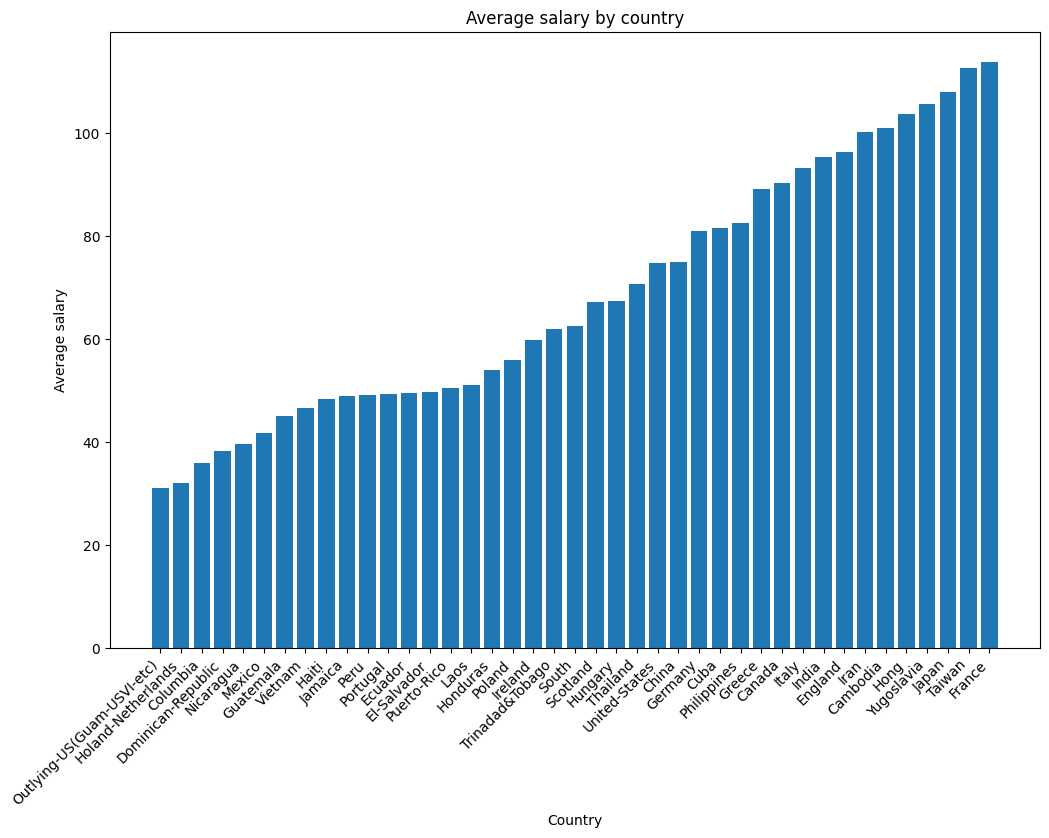

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.set_title("Average salary by country")
ax.set_ylabel("Average salary")
ax.set_xlabel("Country")
ax.set_xticklabels(avg_country_salary.index, rotation=45, ha='right')
ax.bar(avg_country_salary.index, avg_country_salary.values)